**Name :- Suyash Singh**

**Electric Vechicles in india segmentation**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import os 

In [ ]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
data = pd.read_csv('EVIndia.csv')

In [ ]:
data.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


In [ ]:
data.shape

(12, 10)

In [ ]:
data.columns

Index(['Car', 'Style', 'Range', 'Transmission', 'VehicleType', 'PriceRange',
       'Capacity', 'BootSpace', 'BaseModel', 'TopModel'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [ ]:
data.describe()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
count,12,12,12,12,12,12,12,12,12,12
unique,12,7,12,1,1,12,2,8,9,7
top,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,na,na,na
freq,1,6,1,12,12,1,11,4,4,6


In [ ]:
data.isnull().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=  LabelEncoder() 


In [ ]:
data=data.apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,0,0,0,0,0,7,1,1,6,0
1,0,0,0,0,0,6,1,0,5,4
2,0,0,0,0,0,8,1,1,7,5
3,0,0,0,0,0,9,1,3,0,1
4,0,0,0,0,0,10,1,7,1,2


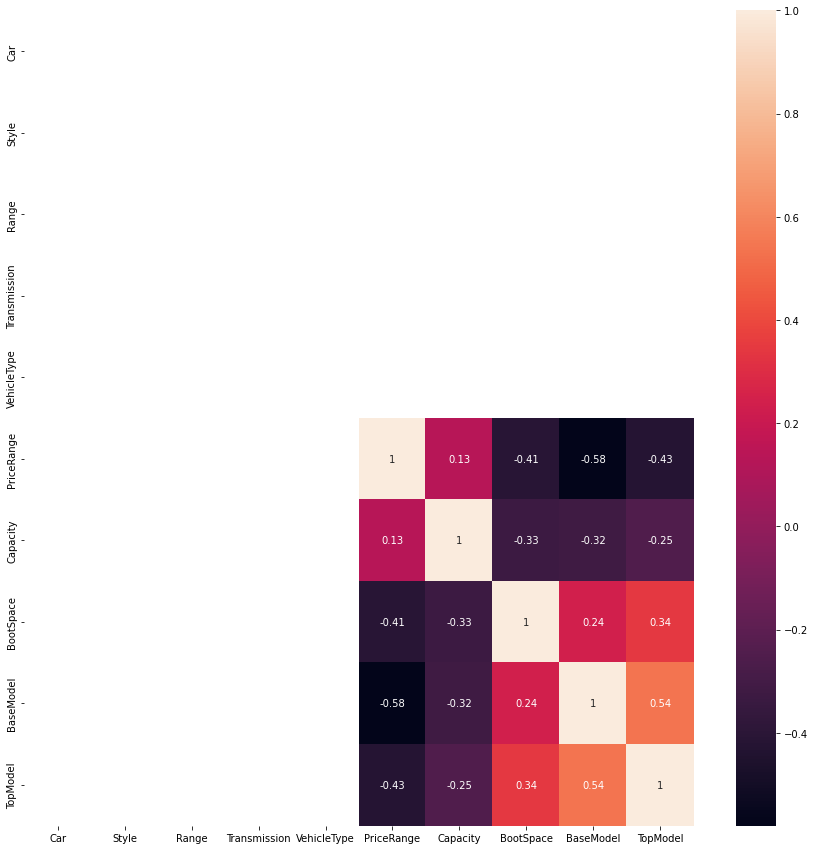

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

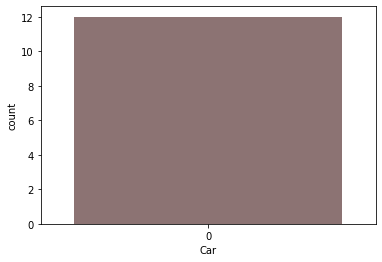

In [ ]:
import seaborn as sns
sns.countplot(x='Car',data=data, color='Red', saturation=0.1)
plt.show()

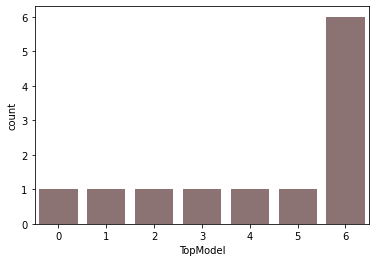

In [ ]:
import seaborn as sns
sns.countplot(x='TopModel',data=data, color='Red', saturation=0.1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


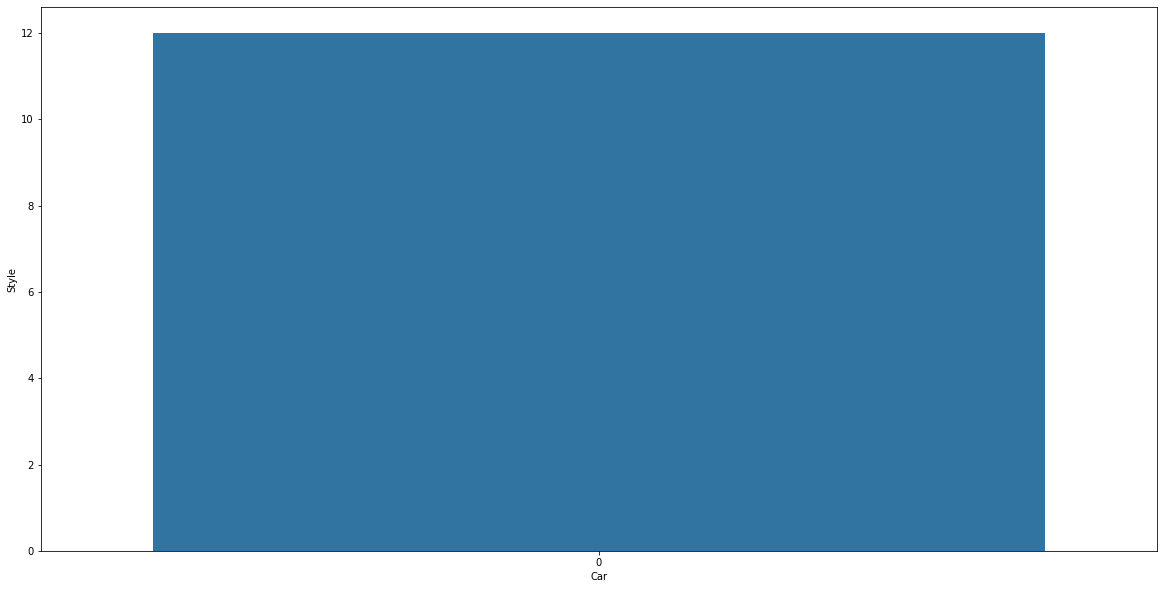

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data.Car)
plt.xlabel("Car")
plt.ylabel("Style")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


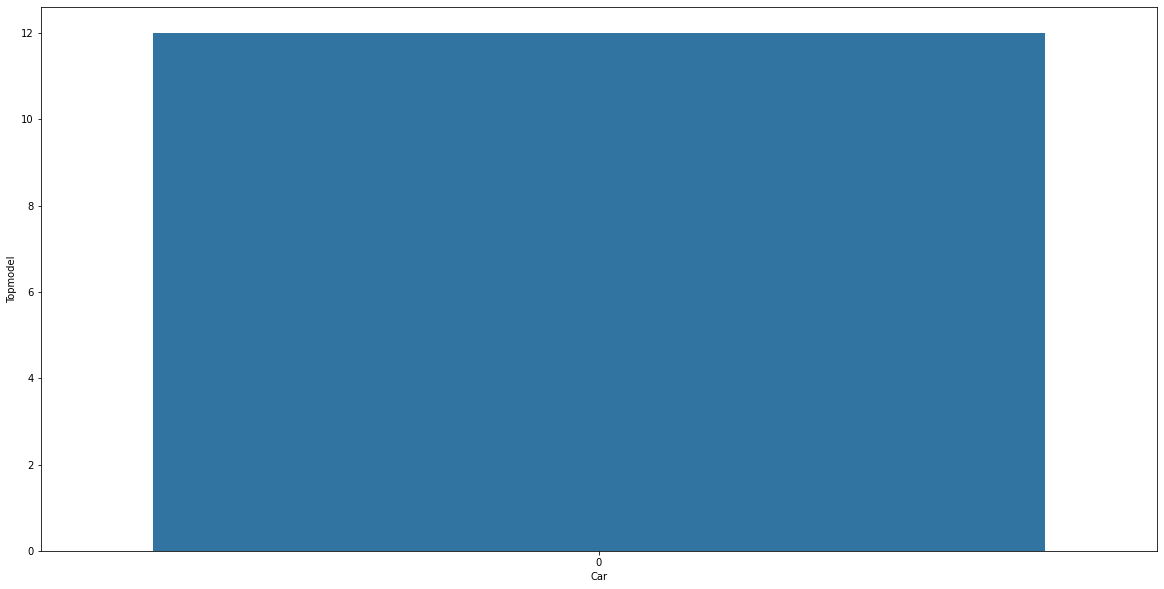

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data.Car)
plt.xlabel("Car")
plt.ylabel("Topmodel")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:115: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7face378ec10>,
      dtype=object)

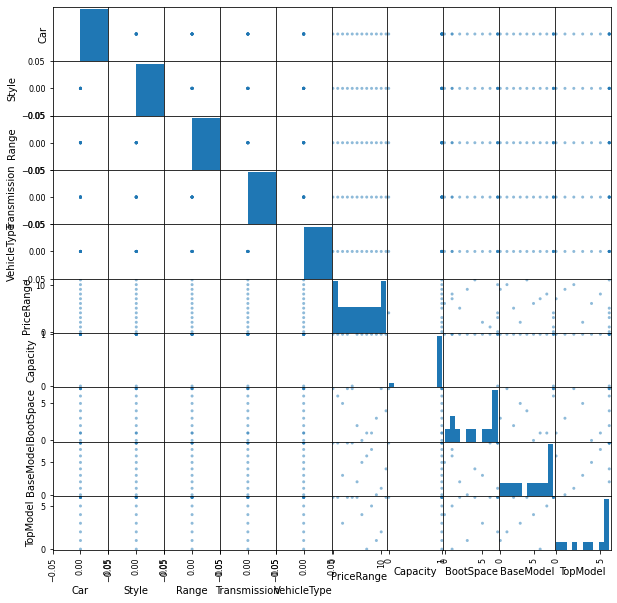

In [ ]:
pd.plotting.scatter_matrix(data, alpha=0.5,figsize=(10,10))

In [ ]:
data

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,0,0,0,0,0,7,1,1,6,0
1,0,0,0,0,0,6,1,0,5,4
2,0,0,0,0,0,8,1,1,7,5
3,0,0,0,0,0,9,1,3,0,1
4,0,0,0,0,0,10,1,7,1,2
5,0,0,0,0,0,2,1,5,3,3
6,0,0,0,0,0,5,1,2,2,6
7,0,0,0,0,0,11,1,4,4,6
8,0,0,0,0,0,0,1,7,8,6
9,0,0,0,0,0,3,1,7,8,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


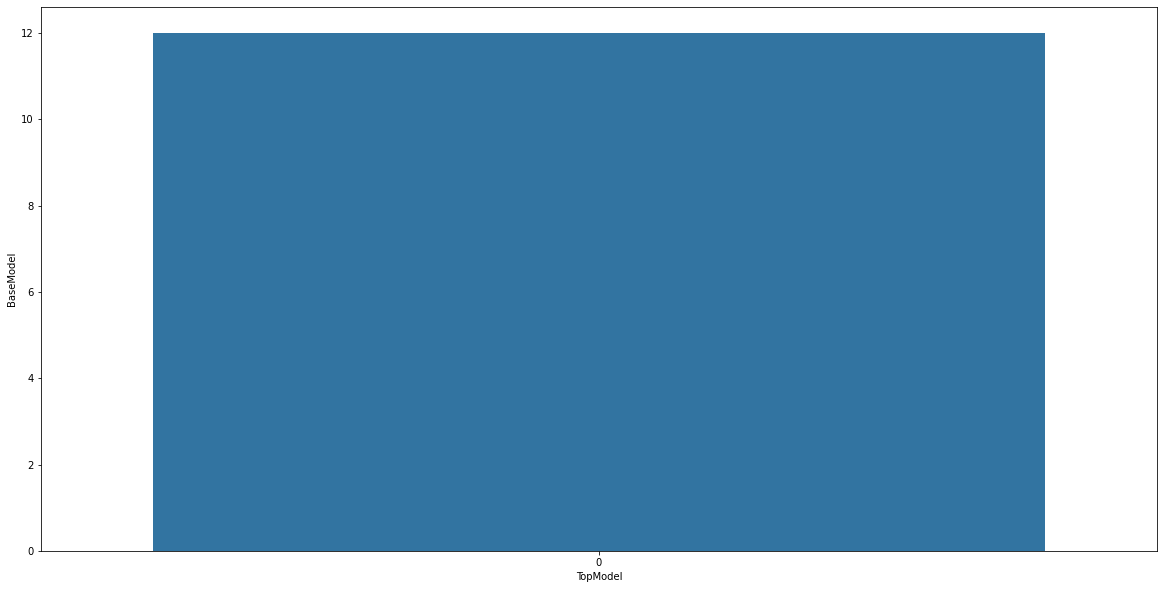

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data.Car)
plt.xlabel("TopModel")
plt.ylabel("BaseModel")
plt.show()

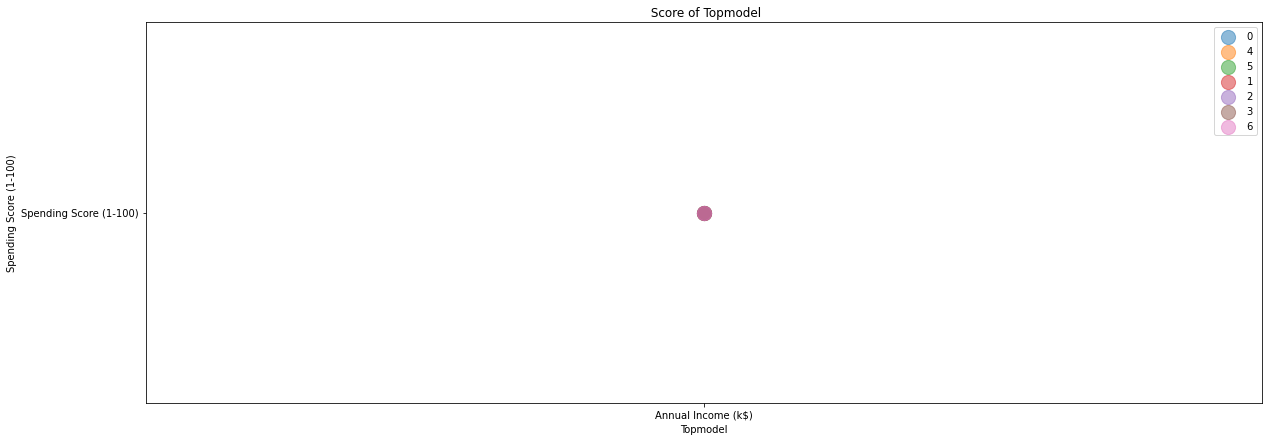

In [ ]:
plt.figure(figsize=(20,7))
TopModel = [0,4,5,1,2,3,6]
for i in TopModel:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)', data=data[data['TopModel']==i],s = 200 , alpha = 0.5 , label = i)
plt.legend()
plt.xlabel("Topmodel")
plt.ylabel("Spending Score (1-100)")
plt.title(" Score of Topmodel")
plt.show()

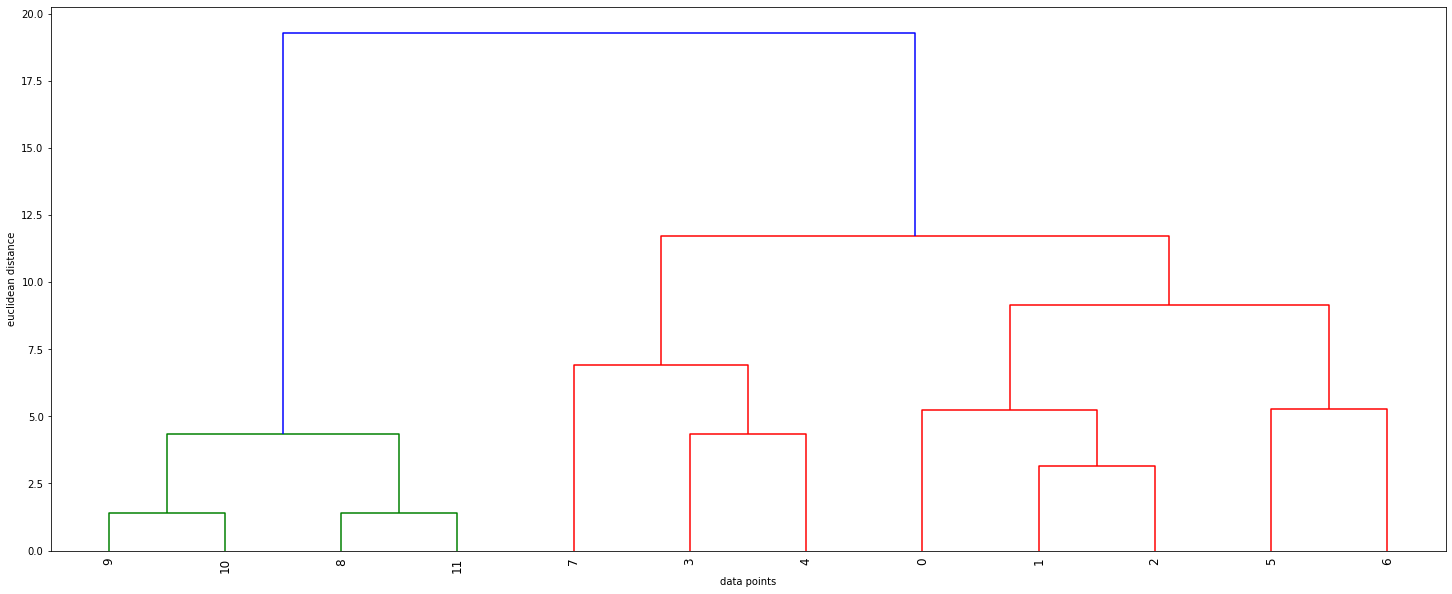

In [ ]:
merg = linkage(data,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()